### Applied Exercise

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

### Answer 8

In [2]:
Auto = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv').dropna()
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
reg = smf.ols('mpg~horsepower', data=Auto).fit()
print('Residual Standard Error : ', (reg.ssr/390)**0.5)
reg.summary()

Residual Standard Error :  4.90575691954594


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        22:21:03   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
T = pd.DataFrame(columns=['horsepower'], data=np.array([98]))
ans = reg.get_prediction(T)
ans.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


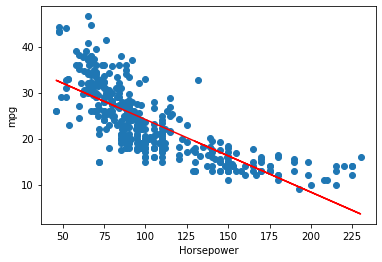

In [5]:
#8(b)
plt.scatter(Auto['horsepower'], Auto['mpg'])
plt.plot(Auto['horsepower'], reg.predict(), color='red')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show()

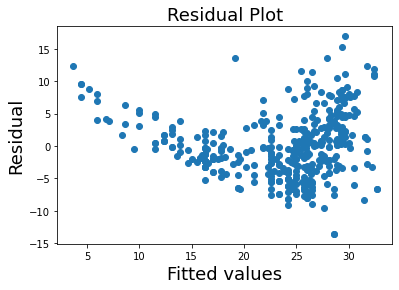

<Figure size 432x288 with 0 Axes>

In [6]:
#8(c)
plt.scatter(reg.predict(), Auto['mpg']-reg.predict())
plt.xlabel("Fitted values", fontsize=18)
plt.ylabel("Residual", fontsize=18)
plt.title('Residual Plot', fontsize=18)
plt.show()
plt.clf()

### Answer 9

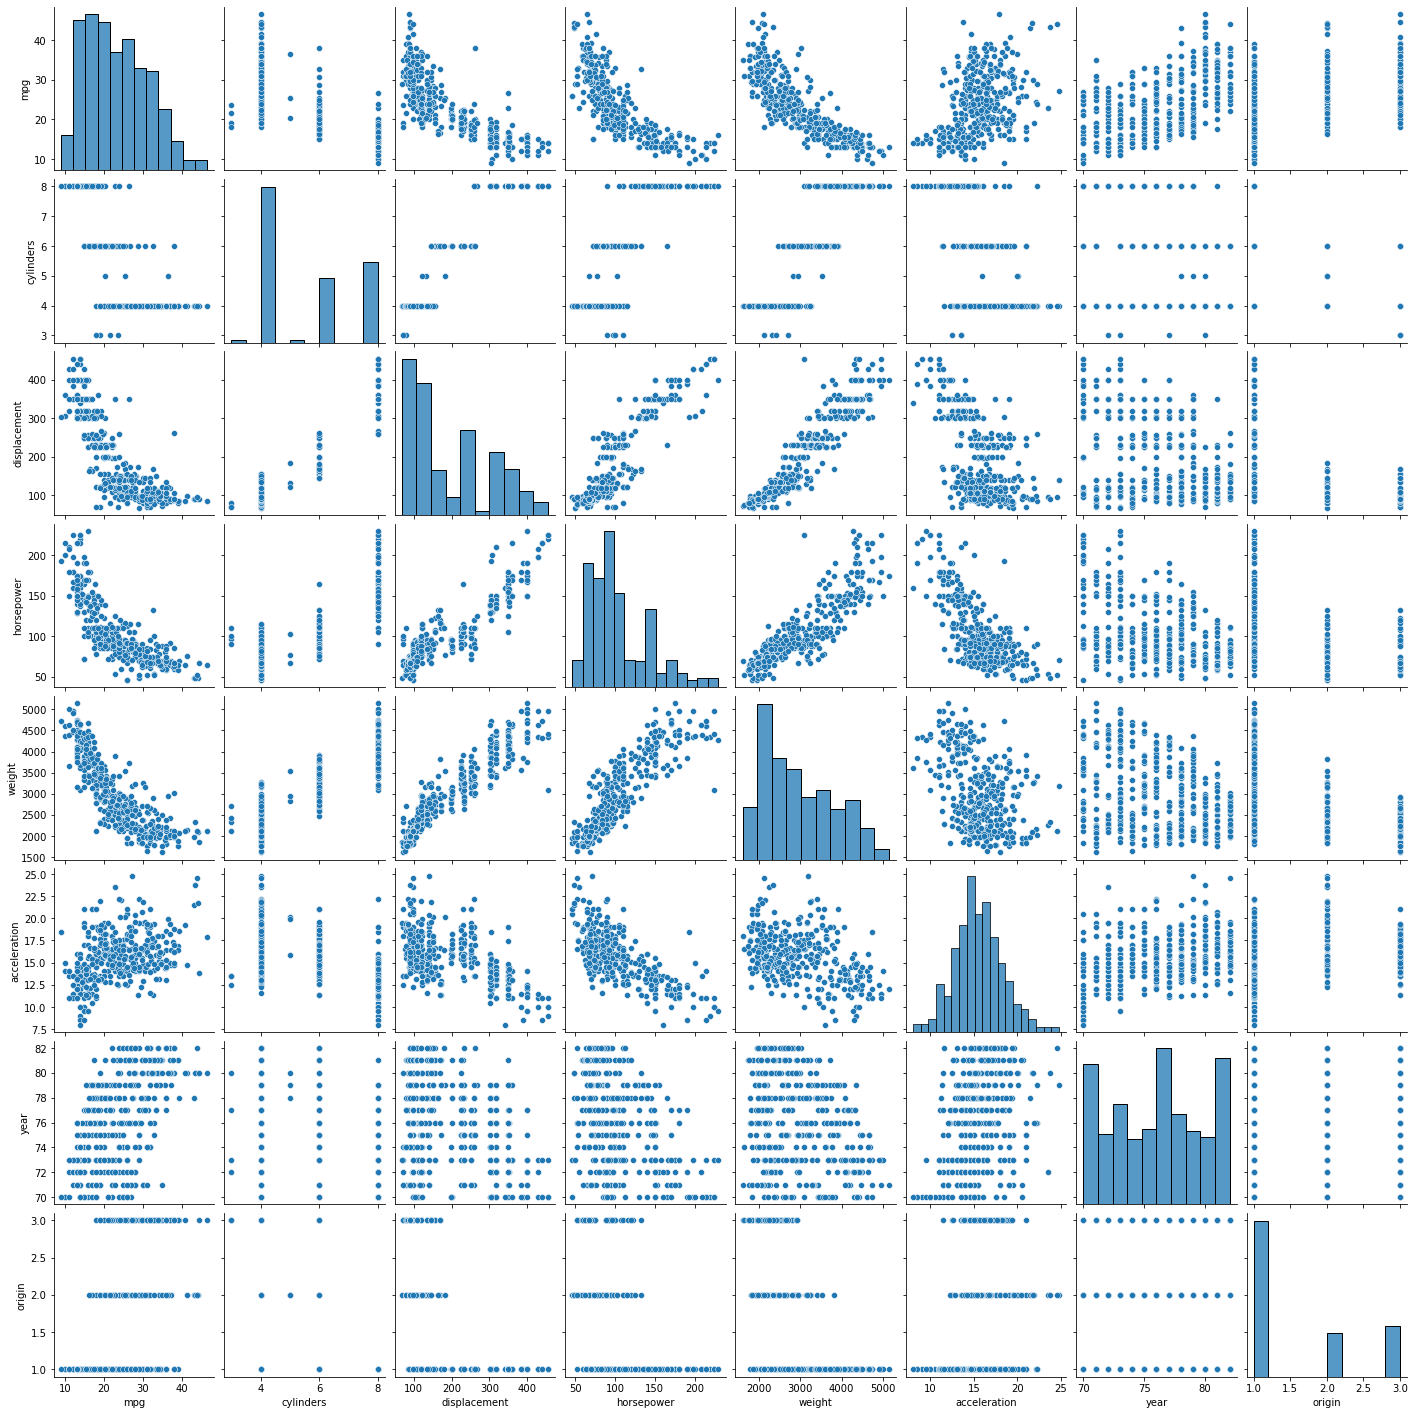

In [7]:
#9(a)
sns.pairplot(Auto)

In [8]:
#9(b)
Auto.drop(['name','mpg'], axis=1).corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [9]:
#9(c)
X, y = Auto.drop(['mpg','name'], axis=1), Auto['mpg']
f = '+'.join(X.columns)
m_reg = smf.ols('mpg~'+f, data=Auto).fit()
n = Auto.shape[0]
p = X.shape[1]
print('Residual Standard Error : ', (m_reg.ssr/(n-p-1))**0.5)
m_reg.summary()

Residual Standard Error :  3.3276823964066384


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        22:21:22   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

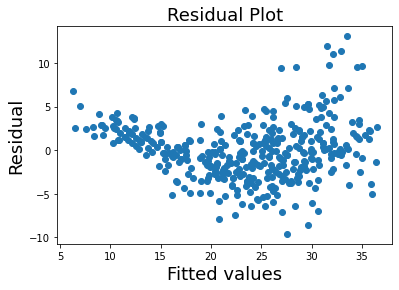

Figure(432x288)


<Figure size 432x288 with 0 Axes>

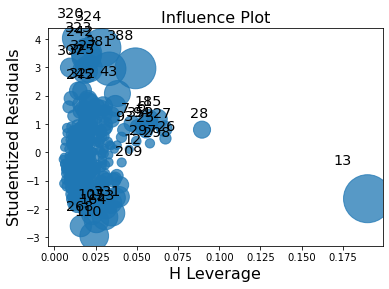

In [10]:
#9(d)
plt.scatter(m_reg.predict(), y-m_reg.predict())
plt.xlabel("Fitted values", fontsize=18)
plt.ylabel("Residual", fontsize=18)
plt.title('Residual Plot', fontsize=18)
plt.show()
plt.clf()
fig = sm.graphics.influence_plot(m_reg, criterion="cooks")
print(fig)

In [11]:
#9(e)

ia = []
for i in range(1,8):
    for j in range(1,i):
        ia.append('{}*{}'.format(Auto.columns[i],Auto.columns[j]))

ans = []
for i in range(21):
    reg = smf.ols('mpg~'+ia[i], data=Auto).fit()
    ans.append([ia[i], np.round(reg.pvalues.iloc[3] , decimals=4), np.round(reg.rsquared , decimals=4)])
iterms = pd.DataFrame(columns=['Predictor', 'p-value for x:y', 'r-squared'], data=ans)
iterms

,Predictor,p-value for x:y,r-squared
0,displacement*cylinders,0.0000,0.6769
1,horsepower*cylinders,0.0000,0.7270
2,horsepower*displacement,0.0000,0.7466
3,weight*cylinders,0.0000,0.7174
4,weight*displacement,0.0000,0.7265
5,weight*horsepower,0.0000,0.7484
6,acceleration*cylinders,0.0549,0.6097
7,acceleration*displacement,0.0000,0.6766
8,acceleration*horsepower,0.0000,0.6809
9,acceleration*weight,0.0043,0.7060


In [12]:
#9(f)
#9(c)(ii) suggested linear contribution of origin, weight, year.
#9(e) suggested about interaction terms. 
#weight*year explained maximum variability in dataset with strong evidence to reject null hypothesis. 
#cylinders*horsepower also suggested high variability without interacting with year, weight variables.
Final_reg = smf.ols('mpg~origin + cylinders*horsepower + weight*year + np.log(weight)', data = Auto).fit()
n = Auto.shape[0]
p = 8
print('Residual Standard Error : ', (Final_reg.ssr/(n-p-1))**0.5)
Final_reg.summary()

Residual Standard Error :  2.8513437180265444


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     318.3
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          4.85e-164
Time:                        22:21:24   Log-Likelihood:                -962.41
No. Observations:                 392   AIC:                             1943.
Df Residuals:                     383   BIC:                             1979.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               51.6201     43.595      1.184      0.237     -34.094     137.335
origin                   0.7129      0.237      3.011      0.003       0.247       1.178
cylinders               -2.3450      0.582     -4.028      0.000      -3.490      -1.200
horsepower              -0.1861      0.037     -5.048      0.000      -0.259      -0.114
cylinders:horsepower     0.0223      0.005      4.327      0.000       0.012       0.032
weight                   0.0193      0.005      3.929      0.000       0.010       0.029
year                     1.4548      0.176      8.281      0.000       1.109       1.800
weight:year             -0.0003   6.25e-05     -4.051      0.000      -0.000      -0.000
np.log(weight)         -15.3293      6.080     -2.521      0.012     -27.284      -3.375
==============================================================================
Omnibus:                       49.225   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.772
Skew:                           0.686   Prob(JB):                     7.95e-23
Kurtosis:                       5.085   Cond. No.                     7.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

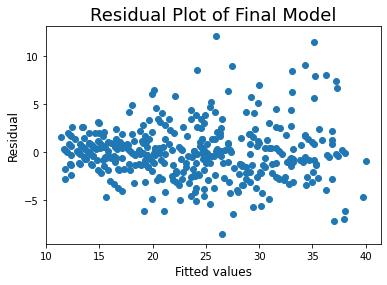

In [13]:
plt.scatter(Final_reg.predict(), Auto['mpg']-Final_reg.predict())
plt.xlabel("Fitted values", fontsize=12)
plt.ylabel("Residual", fontsize=12)
plt.title('Residual Plot of Final Model', fontsize=18)
plt.show()

Residual Standard Error :  0.11925945977008294
                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     400.4
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          3.98e-172
Time:                        22:21:24   Log-Likelihood:                 281.90
No. Observations:                 392   AIC:                            -547.8
Df Residuals:                     384   BIC:                            -516.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
I

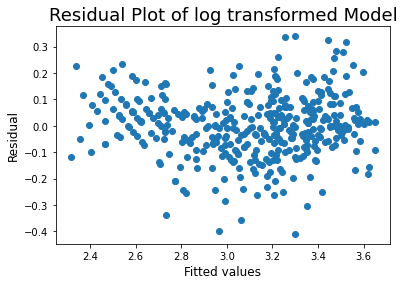

In [14]:
#Trying log transformation...
log_reg = smf.ols('np.log(mpg)~'+f, data = Auto).fit()
n = Auto.shape[0]
p = 8
print('Residual Standard Error : ', (log_reg.ssr/(n-p-1))**0.5)
print(log_reg.summary())

plt.scatter(log_reg.predict(), np.log(Auto['mpg'])-log_reg.predict())
plt.xlabel("Fitted values", fontsize=12)
plt.ylabel("Residual", fontsize=12)
plt.title('Residual Plot of log transformed Model', fontsize=18)
plt.show()

log transformation improved the model and explained the data quite well. Heteroscedasticity has also reduced as can be seen in Residual plot.

### Answer 10

In [15]:
CS = pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Carseats.csv').drop("Unnamed: 0", axis=1).dropna()
CS.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [16]:
#10(a)
m_reg = smf.ols('Sales~Price + Urban + US', data=CS).fit()
print('Residual Standard Error : ', (m_reg.ssr/(400-3-1))**0.5)
m_reg.summary()

Residual Standard Error :  2.4724924402701642


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        22:21:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#10(e)
new_reg = smf.ols('Sales~Price + US', data=CS).fit()
print('Residual Standard Error : ', (new_reg.ssr/(400-2-1))**0.5)
new_reg.summary()

Residual Standard Error :  2.4693968005744447


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        22:21:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(1080x1080)


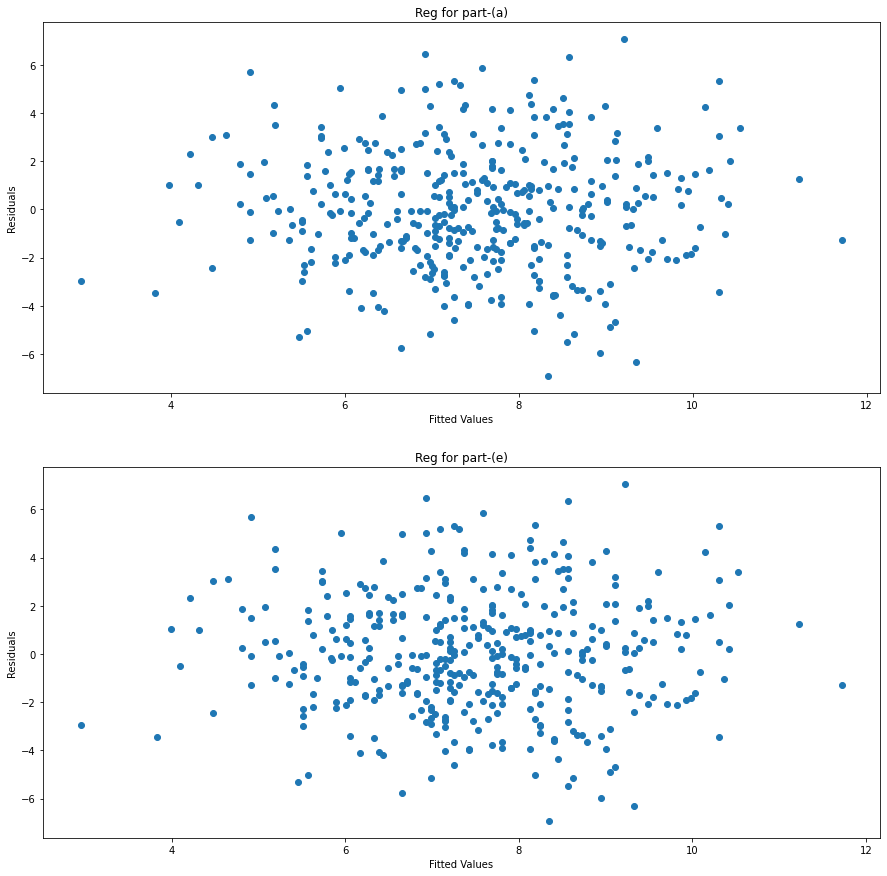

In [18]:
fig, ax = plt.subplots(2, figsize=(15, 15))
ax[0].scatter(m_reg.predict(CS[['Price','Urban','US']]), CS['Sales'] - m_reg.predict(CS[['Price','Urban','US']]))
ax[0].set(xlabel='Fitted Values', ylabel='Residuals', title = 'Reg for part-(a)')
ax[1].scatter(new_reg.predict(CS[['Price','US']]), CS['Sales'] - new_reg.predict(CS[['Price','US']]))
ax[1].set(xlabel='Fitted Values', ylabel='Residuals', title = 'Reg for part-(e)')
print(fig)

In [19]:
#10 (g)
#dir(m_reg)
print('Reg based on Part (a)\n', m_reg.conf_int(), '\n\n\nReg based on Part (e)\n', new_reg.conf_int())

Reg based on Part (a)
                       0          1
Intercept     11.763597  14.323341
Urban[T.Yes]  -0.555973   0.512141
US[T.Yes]      0.691304   1.709841
Price         -0.064764  -0.044154 


Reg based on Part (e)
                   0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195


Figure(432x288)


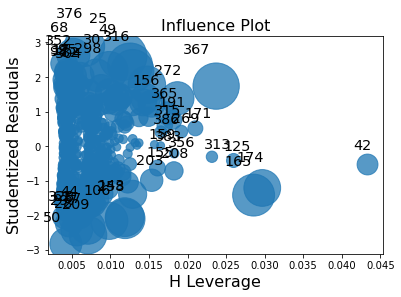

In [20]:
print(sm.graphics.influence_plot(new_reg, criterion="cooks"))

### Answer 11

In [21]:
np.random.seed(1)
x = np.random.normal(0,1,(100, 1))
y = 2*x + np.random.normal(0,1,(100, 1))

In [22]:
#(a)
ofx = sm.OLS(y,x).fit()
print(ofx.summary(),'\nResidual Standard Error : ',((ofx.ssr/99)**0.5))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Thu, 22 Apr 2021   Prob (F-statistic):                    3.46e-36
Time:                        22:21:29   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
#(b)
ofy = sm.OLS(x,y).fit()
print(ofy.summary(),'\nResidual Standard Error : ',((ofy.ssr/99)**0.5))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Thu, 22 Apr 2021   Prob (F-statistic):                    3.46e-36
Time:                        22:21:29   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
#(f)
icpt1 = sm.OLS(y, sm.add_constant(x)).fit()
print('Intercepted reg of Y onto X\n', icpt1.summary())
icpt2 = sm.OLS(x, sm.add_constant(y)).fit()
print('\n\n\nIntercepted reg of X onto Y\n', icpt2.summary())

Intercepted reg of Y onto X
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           5.39e-36
Time:                        22:21:29   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470  

### Answer 12

In [25]:
#(b)
np.random.seed(1)
x = np.random.normal(0,1,(100, 1))
y = 5*x + np.random.normal(0,1,(100, 1))
reg12b1, reg12b2 = sm.OLS(y, x).fit(), sm.OLS(x, y).fit()
print(reg12b1.params, reg12b2.params)

[5.10674169] [0.18774415]


In [26]:
#(c)
np.random.seed(1)
x = np.random.normal(0,1,(100, 1))
y = x
reg12c1, reg12c2 = sm.OLS(y, x).fit(), sm.OLS(x, y).fit()
print(reg12c1.params, reg12c2.params)

[1.] [1.]


### Answer 13

In [27]:
#(a)
np.random.seed(1)
x = np.random.normal(0, 1, (100,1))
#(b)
eps = np.random.normal(0, 0.5, (100,1))
#(c)
y = -1 + (0.5*x) + eps
y.size
#b0 = -1 and b1 = 0.5

100

In [28]:
#(d), (e) and (f)
reg = sm.OLS(y, sm.add_constant(x)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.20e-17
Time:                        22:21:29   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

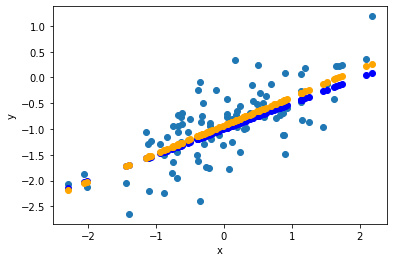

In [29]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, -1 + (0.5*x), color = 'blue') #fn line without any error in observation
plt.scatter(x, reg.predict(), color = 'orange') #predicted line
plt.show()

In [30]:
#(g)
new_x = []
for i in range(100):
    new_x.append([1, x[i][0], x[i][0]**2])
poly = sm.OLS(y, new_x).fit()
poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.83e-16
Time:                        22:21:30   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x1             0.5468      0.053     10.229      0.000       0.441       0.653
x2             0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


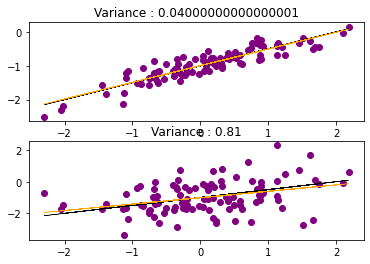

In [31]:
#(h) and (i)
fig, ax = plt.subplots(2)
dev = [0.2, 0.9]
vreg = []
for i in range(len(dev)):
    eps = np.random.normal(0, dev[i], (100,1))
    y = -1 + (0.5*x) + eps
    vreg.append(sm.OLS(y, sm.add_constant(x)).fit())
    ax[i].scatter(x,y, color = 'purple')
    ax[i].plot(x, -1 + (0.5*x), color = 'black', linewidth=0.5)
    ax[i].plot(x, vreg[i].predict(), color = 'orange', linewidth=0.5)
    ax[i].set(title = 'Variance : {}'.format(dev[i]**2))
print(fig)

In [32]:
#(j)
print('Original Data: ', reg.conf_int_el(1), '\nLess Noise Data : ', vreg[0].conf_int_el(1), '\nMore Noise Data : ', vreg[1].conf_int_el(1))

Original Data:  (0.44802792861021173, 0.6524223448955634) 
Less Noise Data :  (0.43966668121708996, 0.5423846575406989) 
More Noise Data :  (0.17241671636329375, 0.6382083040627499)


### Answer 14

In [33]:
#a
np.random.seed(1)
x1 = np.random.uniform(size = (100,1))
x2 = 0.5*x1 + np.random.normal(size = (100, 1))/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = (100, 1))

[[1.         0.83905962]
 [0.83905962 1.        ]]


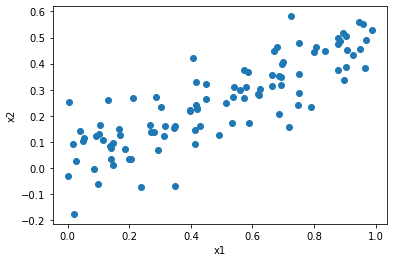

In [34]:
#(b)
print(np.corrcoef(x1, x2, rowvar = False))
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [35]:
#(c)
X = []
for i in range(100):
    X.append([1, x1[i][0], x2[i][0]])
multi = sm.OLS(y, X).fit()
multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           4.40e-07
Time:                        22:21:32   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#(d)
rx1 = sm.OLS(y, sm.add_constant(x1)).fit()
rx1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           6.68e-07
Time:                        22:21:32   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#(e)
rx2 = sm.OLS(y, sm.add_constant(x2)).fit()
rx2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.09e-07
Time:                        22:21:32   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.000       1.895       2.636
x1             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#(g)
new_x1 = np.append(x1, [[0.1]]).reshape(-1,1)
new_x2 = np.append(x2, [[0.8]]).reshape(-1,1)
new_y = np.append(y, [[6]]).reshape(-1,1)
new_X = X.copy()
new_X.append([1, 0.1, 0.8])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           5.51e-08
Time:                        22:21:32   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1996      0.199     11.041      0.0

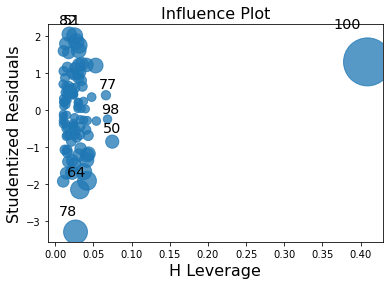

In [39]:
new_multi = sm.OLS(new_y, new_X).fit()
print(new_multi.summary())
print(sm.graphics.influence_plot(new_multi, criterion="cooks"))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           9.15e-06
Time:                        22:21:33   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      0.208     11.331      0.0

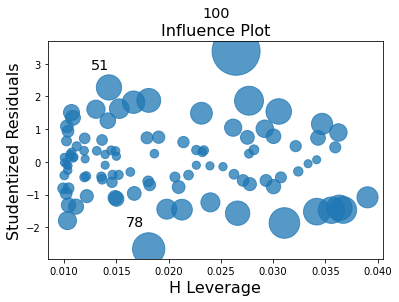

In [40]:
new_rx1 = sm.OLS(new_y, sm.add_constant(new_x1)).fit()
print(new_rx1.summary())
print(sm.graphics.influence_plot(new_rx1, criterion="cooks"))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           7.41e-09
Time:                        22:21:33   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2331      0.182     12.271      0.0

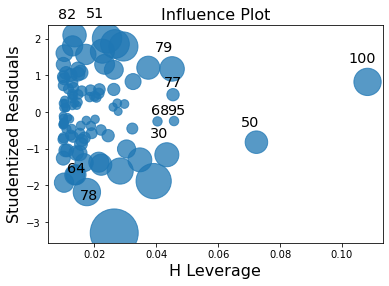

In [41]:
new_rx2 = sm.OLS(new_y, sm.add_constant(new_x2)).fit()
print(new_rx2.summary())
print(sm.graphics.influence_plot(new_rx2, criterion="cooks"))

### Answer 15

In [42]:
Boston = pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Boston.csv').drop('Unnamed: 0', axis=1).dropna()
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


,predictor,p-value,r-squared
0,zn,0.0000,0.0402
1,indus,0.0000,0.1653
2,chas,0.2094,0.0031
3,nox,0.0000,0.1772
4,rm,0.0000,0.0481
5,age,0.0000,0.1244
6,dis,0.0000,0.1441
7,rad,0.0000,0.3913
8,tax,0.0000,0.3396
9,ptratio,0.0000,0.0841


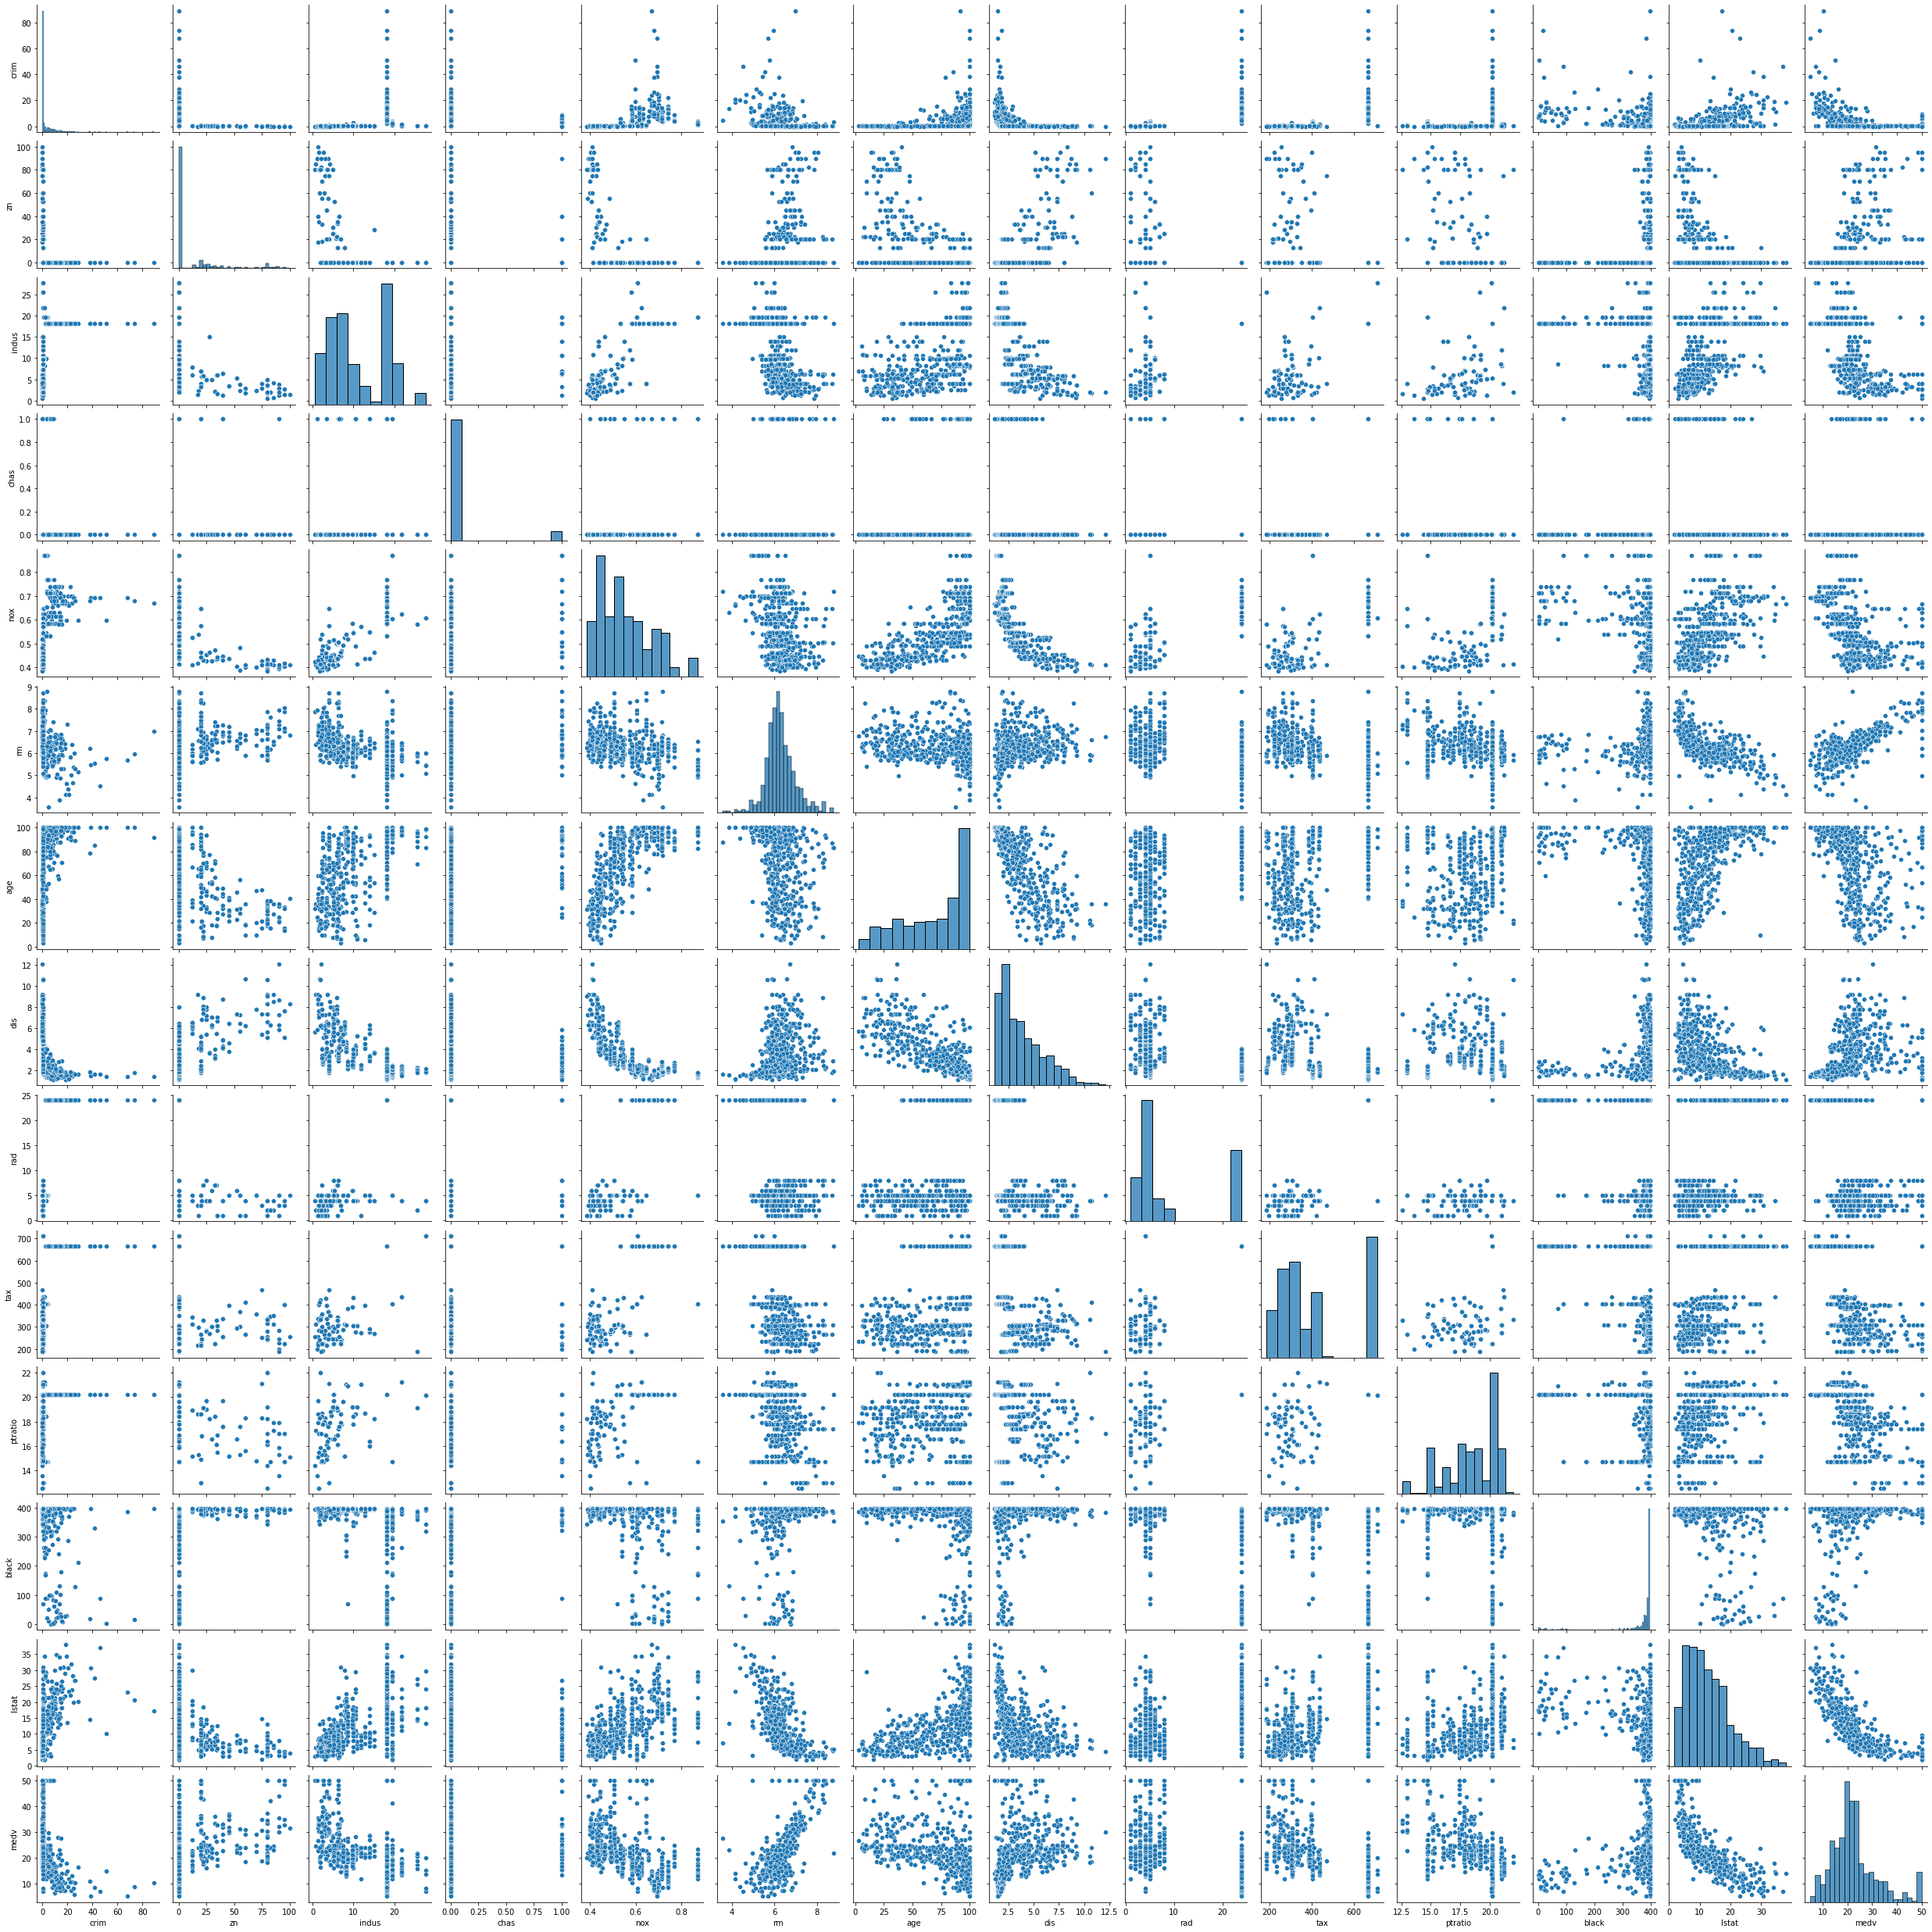

In [43]:
#(a)
print("\n")
univ_rcoef = []
ans = []
for i in range(13):
    reg = smf.ols('crim~'+Boston.columns[i+1], data=Boston).fit()
    univ_rcoef.append(reg.params[1])
    ans.append([Boston.columns[i+1],np.round(reg.pvalues[Boston.columns[i+1]] , decimals=4), np.round(reg.rsquared , decimals=4)])
results = pd.DataFrame(columns=['predictor','p-value','r-squared'], data = ans)
sns.pairplot(Boston)
results

In [44]:
#(b)
bos_mu = smf.ols('crim~'+'+'.join(Boston.columns[1:]), data=Boston).fit()
bos_mu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        22:22:40   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

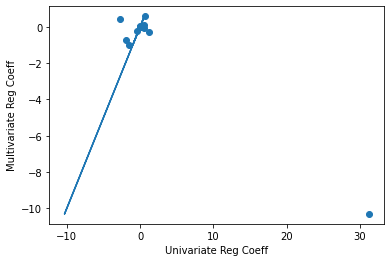

In [45]:
#(c)
multi_rcoef = bos_mu.params[1:]
mrc = multi_rcoef.values
urc = np.array(univ_rcoef)

plt.scatter(urc, mrc)
plt.plot(mrc, mrc) #plotting y=x just to make picture easily interpretable.
plt.xlabel('Univariate Reg Coeff')
plt.ylabel('Multivariate Reg Coeff')
plt.show()

In [46]:
#(d)
def sq(x):
    return x**2
def cu(x):
    return x**3

for i in range(13):
    f=(Boston.columns[i+1])
    reg = smf.ols('crim~'+f+'+ sq('+f+') + cu('+f+')', data=Boston).fit()
    print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        22:22:40   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.0

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.31e-55
Time:                        22:22:40   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6055      2.050     -0.295      0.7